<a href="https://colab.research.google.com/github/andrebezada/Cuadernos/blob/main/Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import numpy as np
import torch.nn as nn
import torch.optim as optim 

import matplotlib.pyplot as plt

# Regresión Lineal

---



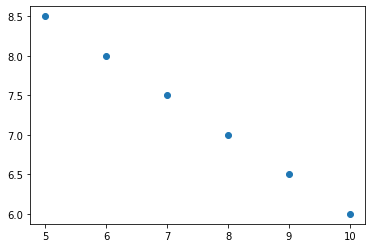

In [ ]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [ ]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.016145238652825356


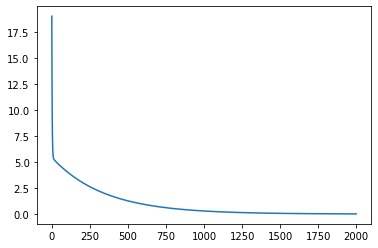

In [ ]:
model = nn.Linear(1, 1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [ ]:
x = torch.Tensor([[14.0]])
p = model(x)
p

tensor([[4.4435]], grad_fn=<AddmmBackward>)

# Regresión Logística

---



In [ ]:
n = 100
h = n // 2
dimen = 2 
data = np.random.randn(n, dimen)*3
data


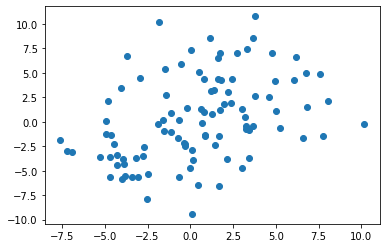

In [ ]:
plt.scatter(data[:,0], data[:,1])

In [ ]:
data [:h, :] = data[:h, :] - 3*np.ones((h, dimen))


In [ ]:
data [h:, :] = data[h:, :] + 3*np.ones((h, dimen))

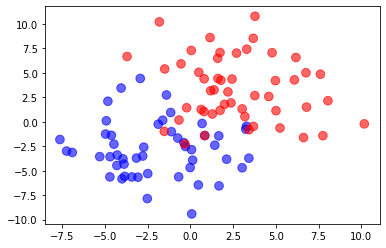

In [ ]:
colors = ['blue', 'red']

color= np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha= 0.6)

In [ ]:
target= np.array([0]*h +[1]*h).reshape(n, 1)

x= torch.from_numpy(data).float().requires_grad_(True)

y= torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2009, grad_fn=<BinaryCrossEntropyBackward>)

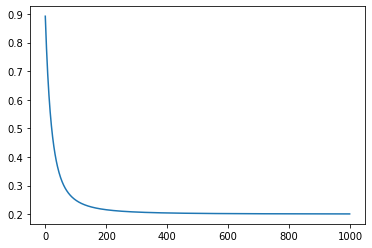

In [ ]:
model = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
        )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr= 0.01)

losses = []

iterations = 1000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [ ]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])



blue
red


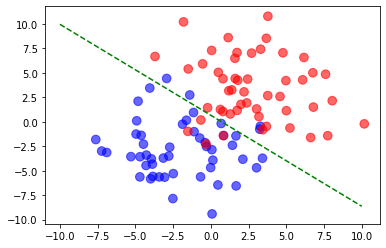

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')